# MEDICAL DECISION SUPPORT APPLICATION PREDICTING SUCCESS OF PEDIATRIC BONE MARROW TRANSPLANTS WITH EXPLAINABLE ML (SHAP)

Dans un contexte médical comme la transplantation, il faut généralement privilégier un haut recall pour ne pas manquer de cas critiques. Par exemple un faux négatif signifie qu'on prédit un échec de transplantation alors que c'était un succès. Cela pourrait mener à refuser une transplantation à un patient qui aurait pu en bénéficier et la conséquence pourrait être fatale car le patient pourrait ne pas recevoir un organe compatible à temps.

Ensuite, nous allons privilégier un bon ROC-AUC pour la fiabilité générale de notre modèle et un bon F1-Score pour l'équilibre entre recall et précision.

Bien que `Random Forest` montre une meilleure précision (0.962) et `XGBoost` ait des performances similaires, le `SVC` se démarque principalement grâce à son recall supérieur(0.915) et son ROC-AUC de 0.979, qui est crucial dans le contexte de la transplantation où nous voulons minimiser le risque de manquer des opportunités de transplantation réussie.

### CONSTRUCTION DE MODELES AVEC OVERSAMPLING APPLIQUE

In [ ]:
# Création d'une pipeline pour standardiser les valeurs de notre jeu de données
valeurs_numeriques = make_column_selector(dtype_include=np.number)
pipeline_standard = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((pipeline_standard, valeurs_numeriques))
pipeline = make_pipeline(preprocessor)
pipeline.fit(pd.DataFrame(X2_smote))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DFA0096000>)]))])

In [ ]:
from joblib import dump

dump(pipeline, 'pipeline_smote.joblib')

['pipeline_smote.joblib']

In [ ]:
# Standardisation de nos valeurs
X2_smote = pipeline.fit_transform(X2_smote)

In [ ]:
# Encodage de notre variable cible
encoder = LabelEncoder()
Y2_smote = encoder.fit_transform(Y2_smote)


Model: Random Forest
Best Hyperparameters: {'n_estimators': 10, 'max_depth': 6}
Performance Metrics:
accuracy: 0.910
precision: 0.939
recall: 0.880
f1: 0.907
roc_auc: 0.966

Model: XG Boost
Best Hyperparameters: {'n_estimators': 50, 'max_depth': 3}
Performance Metrics:
accuracy: 0.935
precision: 0.949
recall: 0.920
f1: 0.934
roc_auc: 0.966

Model: SVC
Best Hyperparameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Performance Metrics:
accuracy: 0.895
precision: 0.857
recall: 0.960
f1: 0.902
roc_auc: 0.980

Model: LightGBM
Best Hyperparameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}
Performance Metrics:
accuracy: 0.920
precision: 0.942
recall: 0.900
f1: 0.919
roc_auc: 0.976


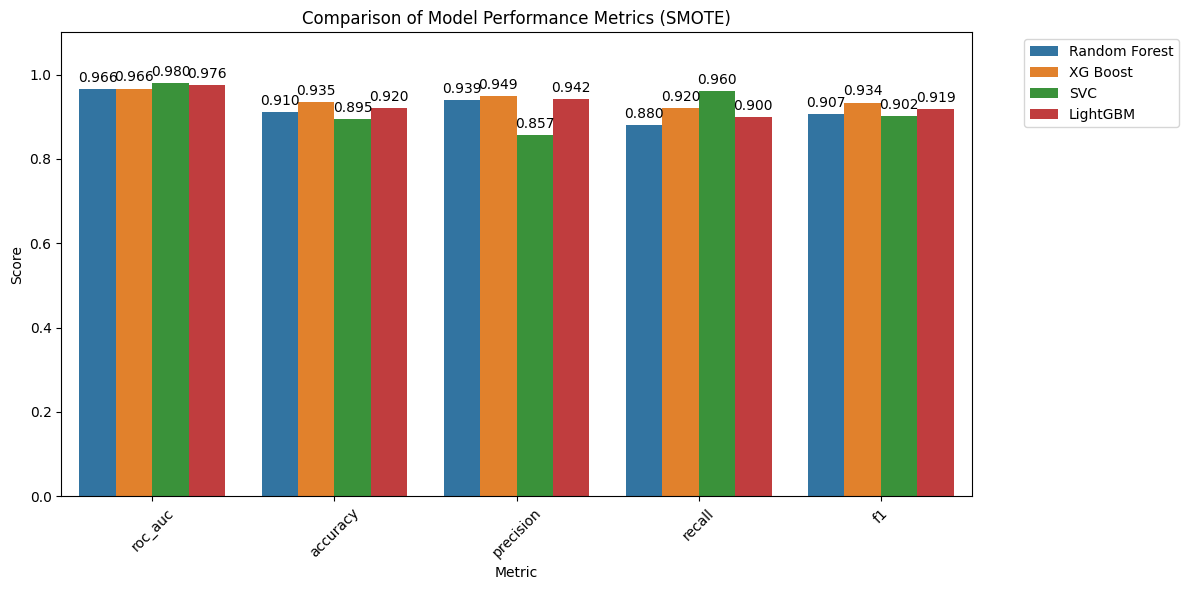

In [ ]:
# Création de listes vides
model_names = []
model_metrics = []

for name, model, param_grid in modeles:
    if name == "LightGBM":
        model.set_params(verbose=-1)

    metrics, best_model = evaluation_model_weighted(X2_smote, Y2_smote, model, param_grid)

    # Stockage des résultats
    model_names.append(name)
    model_metrics.append(metrics)

    print(f'\nModel: {name}')
    # Obtention des meilleurs hyperparamètres
    params_specifie = {param: best_model.get_params()[param] for param in param_grid.keys()}
    print(f"Best Hyperparameters: {params_specifie}")

    # Affichage des métriques
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

# Affichage des résultats sous forme de graphique
plt.figure(figsize=(12, 6))
metrics_to_plot = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results_df = pd.DataFrame([
    {**{'Model': name}, **metrics}
    for name, metrics in zip(model_names, model_metrics)
])

results_melted = results_df.melt(
    id_vars=['Model'],
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Score'
)

ax = sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title('Comparison of Model Performance Metrics (SMOTE)')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

En analysant le graphique avec les données SMOTE, `SVC` apparaît comme le meilleur choix pour plusieurs raisons. Tout d'abord, il a le meilleur Recall(0.96), métrique le plus importante dans notre contexte médical. Cela signifie que `SVC` a une meilleure capacité à identifier les vrais positifs et ainsi minimiser le risque de manquer des transplantations potentiellement réussies.
De plus, il a le roc_auc le plus élevé(0.98) et d'excellente performances globales avec à la clé des données rééquilibrées.

### CONSTRUCTION DE MODELES AVEC UNDERSAMPLING APPLIQUE

In [ ]:
# Création d'une pipeline pour standardiser les valeurs de notre jeu de données
valeurs_numeriques = make_column_selector(dtype_include=np.number)
pipeline_standard = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((pipeline_standard, valeurs_numeriques))
pipeline = make_pipeline(preprocessor)
pipeline.fit(pd.DataFrame(X2_under))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DF9BB27CE0>)]))])

In [ ]:
from joblib import dump

dump(pipeline, 'pipeline_under.joblib')

['pipeline_under.joblib']

In [ ]:
# Standardisation de nos valeurs
X2_under = pipeline.fit_transform(X2_under)

In [ ]:
# Encodage de notre variable cible
encoder = LabelEncoder()
Y2_under = encoder.fit_transform(Y2_under)


Model: Random Forest
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 8}
Performance Metrics:
accuracy: 0.902
precision: 0.927
recall: 0.879
f1: 0.900
roc_auc: 0.962

Model: XG Boost
Best Hyperparameters: {'n_estimators': 300, 'max_depth': 3}
Performance Metrics:
accuracy: 0.927
precision: 0.954
recall: 0.904
f1: 0.925
roc_auc: 0.958

Model: SVC
Best Hyperparameters: {'C': 10, 'kernel': 'linear', 'gamma': 'scale'}
Performance Metrics:
accuracy: 0.902
precision: 0.900
recall: 0.915
f1: 0.904
roc_auc: 0.986

Model: LightGBM
Best Hyperparameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
Performance Metrics:
accuracy: 0.915
precision: 0.967
recall: 0.867
f1: 0.911
roc_auc: 0.966


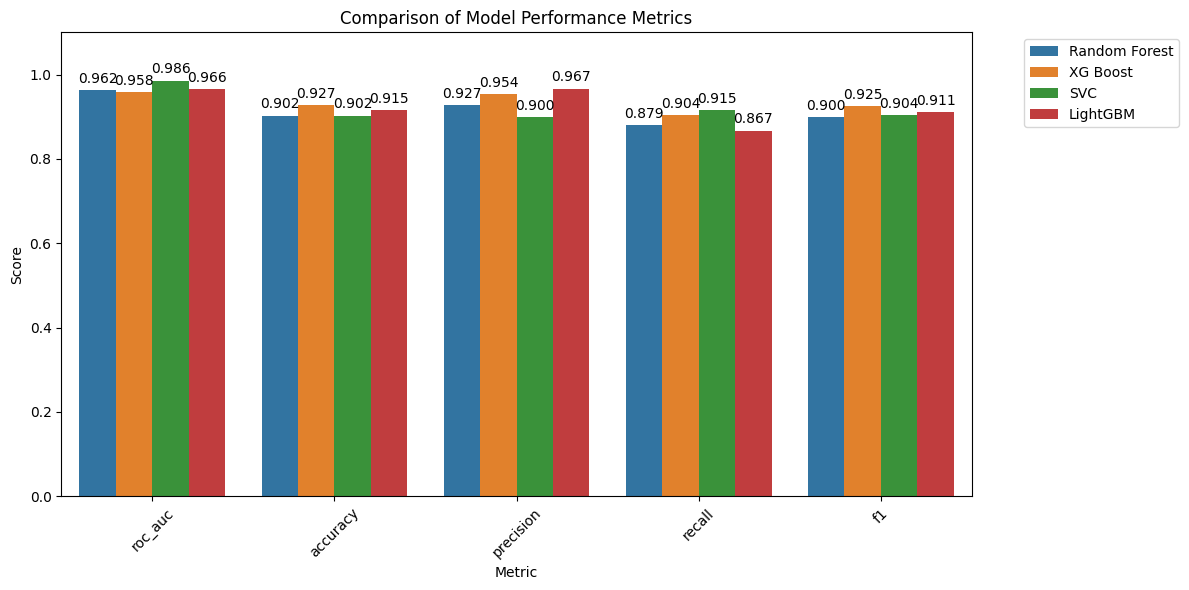

In [ ]:
# Création de listes vides
model_names = []
model_metrics = []

for name, model, param_grid in modeles:
    if name == "LightGBM":
        model.set_params(verbose=-1)

    metrics, best_model = evaluation_model_weighted(X2_under, Y2_under, model, param_grid)

    # Stockage des résultats
    model_names.append(name)
    model_metrics.append(metrics)

    print(f'\nModel: {name}')
    # Obtention des meilleurs hyperparamètres spécifiques
    params_specifie = {param: best_model.get_params()[param] for param in param_grid.keys()}
    print(f"Best Hyperparameters: {params_specifie}")

    # Affichage des métriques
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

# Affichage des graphiques
plt.figure(figsize=(12, 6))
metrics_to_plot = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results_df = pd.DataFrame([
    {**{'Model': name}, **metrics}
    for name, metrics in zip(model_names, model_metrics)
])

results_melted = results_df.melt(
    id_vars=['Model'],
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Score'
)

ax = sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title('Comparison of Model Performance Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dans ce cas de figure, `SVC` a le meilleur recall (0.915) parmi tous les modèles, suivi par `XG Boost` (0.904), puis `Random Forest` (0.879), et enfin `LightGBM` (0.867).

Dans ce cas, `SVC` serait le meilleur choix car plus efficace pour identifier les vrais positifs et ainsi minimiser le risque de manquer des cas de transplantation potentiellement réussis à des fins de sécurité des patients
De plus, il affiche des performances équilibrées et constantes à travers les autres métriques:
   - ROC-AUC très bon (0.986)
   - Bonne précision (0.90)
   - F1-score élevé (0.904)

### CONSTRUCTION DE MODELES AVEC POIDS DE CLASSE APPLIQUES

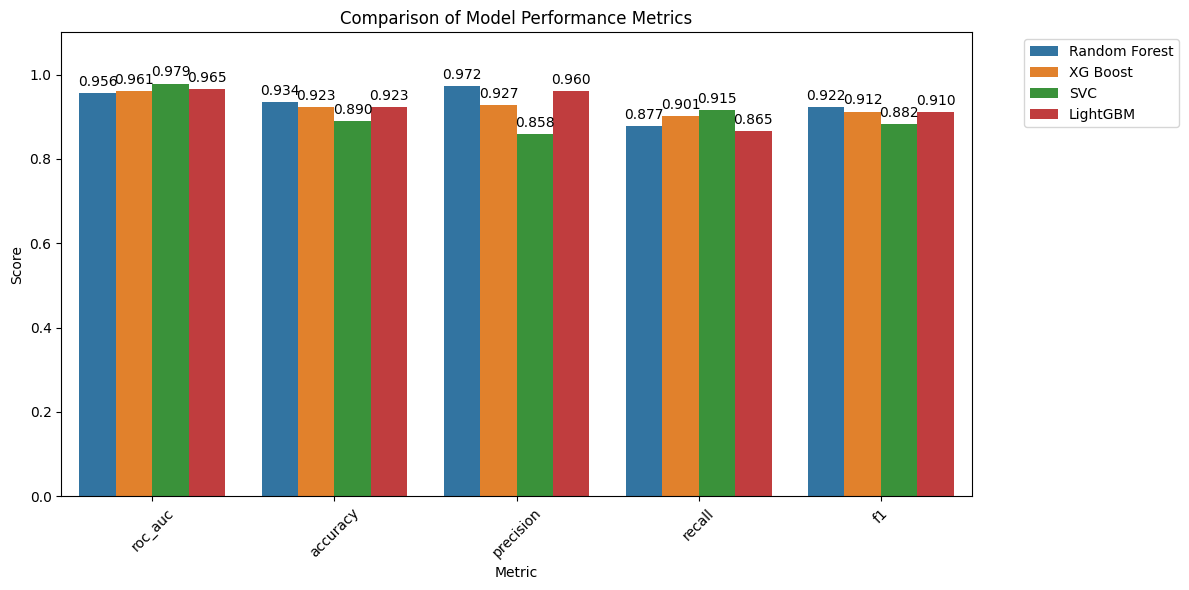


Model: Random Forest

Best Parameters:
n_estimators: 150
max_depth: 4

Performance Metrics:
roc_auc: 0.956
accuracy: 0.934
precision: 0.972
recall: 0.877
f1: 0.922
--------------------------------------------------

Model: XG Boost

Best Parameters:
n_estimators: 50
max_depth: 3

Performance Metrics:
roc_auc: 0.961
accuracy: 0.923
precision: 0.927
recall: 0.901
f1: 0.912
--------------------------------------------------

Model: SVC

Best Parameters:
C: 1
kernel: linear
gamma: scale

Performance Metrics:
roc_auc: 0.979
accuracy: 0.890
precision: 0.858
recall: 0.915
f1: 0.882
--------------------------------------------------

Model: LightGBM

Best Parameters:
n_estimators: 200
max_depth: 3
learning_rate: 0.01

Performance Metrics:
roc_auc: 0.965
accuracy: 0.923
precision: 0.960
recall: 0.865
f1: 0.910
--------------------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

def evaluation_model_weighted(X, y, model, param_grid):
    # Calcul des poids de classe
    class_weights = dict(zip(
        np.unique(y),
        [1 if c == 0 else (y == 0).sum()/(y == 1).sum() for c in np.unique(y)]
    ))

    # Ajout des poids de classe au modèle
    if hasattr(model, 'class_weight'):
        model.set_params(class_weight=class_weights)
    elif isinstance(model, XGBClassifier):
        model.set_params(scale_pos_weight=class_weights[1])
    elif isinstance(model, LGBMClassifier):
        model.set_params(class_weight=class_weights)

    # Grid search avec validation croisée pondérée
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    }

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring=scoring,
        refit='roc_auc',  # Utilisation de l'AUC-ROC comme mesure de performance
        n_jobs=-1
    )

    grid_search.fit(X, y)

    # Récupération des résultats et du meilleur modèle
    best_model = grid_search.best_estimator_
    cv_results = {
        'accuracy': grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_],
        'precision': grid_search.cv_results_['mean_test_precision'][grid_search.best_index_],
        'recall': grid_search.cv_results_['mean_test_recall'][grid_search.best_index_],
        'f1': grid_search.cv_results_['mean_test_f1'][grid_search.best_index_],
        'roc_auc': grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]
    }

    return cv_results, best_model

model_names = []
model_metrics = []

best_models = {}
best_params = {}

for name, model, param_grid in modeles:
    if name == "LightGBM":
        model.set_params(verbose=-1)

    metrics, best_model = evaluation_model_weighted(X2, Y2, model, param_grid)

    # Stockage des résultats
    model_names.append(name)
    model_metrics.append(metrics)
    best_models[name] = best_model
    best_params[name] = {param: best_model.get_params()[param] for param in param_grid.keys()}

# Création du DataFrame de résultats
results_df = pd.DataFrame([
    {**{'Model': name}, **metrics}
    for name, metrics in zip(model_names, model_metrics)
])

plt.figure(figsize=(12, 6))
metrics_to_plot = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results_melted = results_df.melt(
    id_vars=['Model'],
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Score'
)

ax = sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title('Comparison of Model Performance Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)  # Increased y-limit to accommodate labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

for name in model_names:
    model_results = results_df[results_df['Model'] == name].iloc[0]
    print(f'\nModel: {name}')
    print("\nBest Parameters:")
    for param, value in best_params[name].items():
        print(f"{param}: {value}")
    print("\nPerformance Metrics:")
    for metric in metrics_to_plot:
        print(f"{metric}: {model_results[metric]:.3f}")
    print("-" * 50)

Bien que `Random Forest` montre une meilleure précision (0.972), le `SVC` se démarque grâce à son recall supérieur(0.915), qui est crucial dans notre contexte de transplantation où nous voulons minimiser le risque de manquer des opportunités de transplantation réussie. De plus, son ROC-AUC élevé indique une excellente capacité de discrimination générale du modèle.

### CONCLUSION

-   Dans le cas où nous optimisons nos modèles avec les données originales, le modèle ayant les meilleurs performances est le `SVC`. Ce modèle sera celui qu'on choisira dans ce cas de figure avec comme paramètres optimaux `C` d'une valeur égale à **1**, un `kernel` et un `gamma` définis respectivement sur `'linear'` et `'scale'` chacun.


-   Dans le cas où nous optimisons nos modèles avec un **Oversampling**, le modèle ayant les meilleurs performances est le `SVC`. Ce modèle sera celui qu'on choisira dans ce cas de figure avec comme paramètres optimaux `C` d'une valeur égale à **0.1**, un `kernel` et un `gamma` définis respectivement sur `'linear'` et `'scale'` chacun.


-   Dans le cas où nous optimisons nos modèles avec un **Undersampling**, le modèle ayant les meilleurs performances est le `SVC`. Ce modèle sera celui qu'on choisira dans ce cas de figure avec comme paramètres optimaux `C` d'une valeur égale à **10**, un `kernel` et un `gamma` définis respectivement sur `'linear'` et `'scale'` chacun.


-   Dans le cas où nous optimisons nos modèles avec un ajustement des poids des classes, le modèle ayant les meilleurs performances est le `SVC`. Ce modèle sera celui qu'on choisira dans ce cas de figure avec comme paramètres optimaux `C` d'une valeur égale à **1**, un `kernel` et un `gamma` définis respectivement sur `'linear'` et `'scale'` chacun.

### Comparaison des meilleurs modèles de chaque méthode de rééquilibrage des données

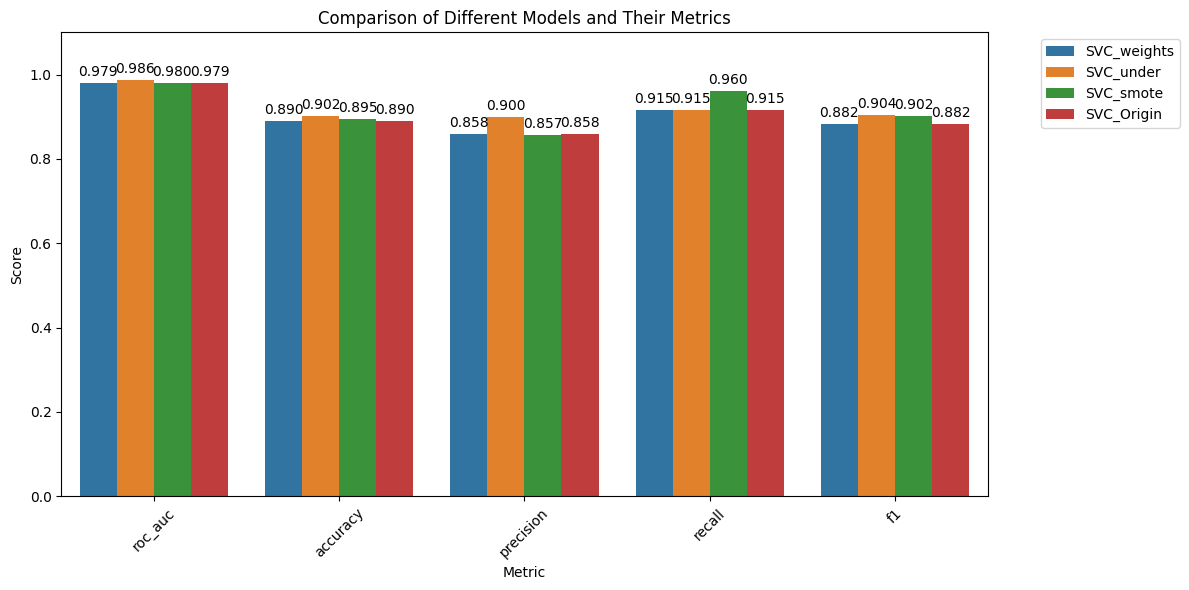

In [ ]:
# Création du DataFrame avec les résultats
results_data = {
    'Model': ['SVC_weights', 'SVC_under', 'SVC_smote', 'SVC_Origin'],
    'roc_auc': [0.979, 0.986, 0.98, 0.979],
    'accuracy': [0.89, 0.902, 0.895, 0.890],
    'precision': [0.858, 0.900, 0.857, 0.858],
    'recall': [0.915, 0.915, 0.960, 0.915],
    'f1': [0.882, 0.904, 0.902, 0.882]
}

results_df = pd.DataFrame(results_data)

# Création du graphique
plt.figure(figsize=(12, 6))
metrics_to_plot = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results_melted = results_df.melt(
    id_vars=['Model'],
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Score'
)

# Plot avec seaborn
ax = sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')

# Ajout des valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title('Comparison of Different Models and Their Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)  # Augmentation de la limite y pour accommoder les labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Ici, le modèle qui se démarque le mieux est le modèle `SVC` entraîné avec un OverSampling. Il affiche un meilleur recall (0.96) et un roc_auc élevé(0.98). En plus de cela, il a d'excellentes performances globales.
Ce modèle sera donc notre modèle final.

In [ ]:
from joblib import dump

Final_Model = SVC(C=0.1, gamma='scale', kernel='linear')
Final_Model.fit(X2_smote, Y2_smote)
dump(Final_Model, 'Final_Model.joblib')

['Final_Model.joblib']